In [29]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchshow as ts
import torchmetrics
import matplotlib.pyplot as plt
from ImageProcessing import ImageProcessor

In [30]:
# Importere dataset, kun træning indtil videre.
training_images = MNIST(root='data', transform=ToTensor(), train=True)
training_dataloader = DataLoader(training_images, batch_size=1000)
testing_images = MNIST(root='data', transform=ToTensor(), train=False)
testing_dataloader = DataLoader(testing_images, batch_size=1000)

In [31]:
# Laver det Neurale Netværk, og opstiller et accuracy objekt til at måle hvor god modellen er.
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,10)
)
# Bruger crossentropy til at udregne losset, og indstiller optimizeren.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01, maximize=False)

In [32]:
# Loop'er over 10 epoker, og udregner loss'et og accuracy for hvert.
def training_loop(training_dataloader, optimizer, loss_fn):
    total_loss = 0
    accuracy.reset()
    size = len(training_dataloader)
    for images,labels in training_dataloader:
        optimizer.zero_grad()
        output = net(images)
        loss = loss_fn(output, labels)
        total_loss += loss
        loss.backward()
        optimizer.step()
        accuracy.update(output, labels)
    avg_loss = total_loss / size
    print(f"Avg Training Accuracy: {accuracy.compute() * 100:.2f}%")
    print(f"Avg Training Loss: {avg_loss}")

def testing_loop(testing_dataloader, loss_fn):
    total_loss = 0
    accuracy.reset()
    size = len(testing_dataloader)
    with torch.no_grad():
        for images,labels in testing_dataloader:
            output = net(images)
            loss = loss_fn(output, labels)
            total_loss += loss
            accuracy.update(output,labels)
    avg_loss = total_loss / size
    print(f"Avg Testing Accuracy: {accuracy.compute() * 100 :.2f}%")
    print(f"Avg Testing Loss: {avg_loss}")

In [33]:
for i in range(5):
    print(f"Epoch: {i}")
    testing_loop(testing_dataloader, loss_fn)
    training_loop(training_dataloader, optimizer, loss_fn)
    print("------------------")

Epoch: 0
Avg Testing Accuracy: 11.50%
Avg Testing Loss: 2.310556411743164
Avg Training Accuracy: 71.82%
Avg Training Loss: 0.8811070322990417
------------------
Epoch: 1
Avg Testing Accuracy: 87.89%
Avg Testing Loss: 0.39800530672073364
Avg Training Accuracy: 89.75%
Avg Training Loss: 0.35515448451042175
------------------
Epoch: 2
Avg Testing Accuracy: 91.11%
Avg Testing Loss: 0.3058135509490967
Avg Training Accuracy: 91.51%
Avg Training Loss: 0.29686880111694336
------------------
Epoch: 3
Avg Testing Accuracy: 91.94%
Avg Testing Loss: 0.27862897515296936
Avg Training Accuracy: 92.23%
Avg Training Loss: 0.27328813076019287
------------------
Epoch: 4
Avg Testing Accuracy: 92.00%
Avg Testing Loss: 0.27081960439682007
Avg Training Accuracy: 92.61%
Avg Training Loss: 0.2602808177471161
------------------


Model output:
tensor([[-7.62502,  3.87374, -4.26453,  2.32193, -6.49759, -1.52553, -5.17332,
         -3.88903, -0.70637, -3.03573]], grad_fn=<AddmmBackward0>)
Efter softmax:
tensor([[8.25604e-06, 8.13993e-01, 2.37802e-04, 1.72456e-01, 2.54923e-05,
         3.67916e-03, 9.58370e-05, 3.46174e-04, 8.34653e-03, 8.12602e-04]],
       grad_fn=<SoftmaxBackward0>)
Modul bud: 1
Korrekt svar: 1


torch.Size([1, 28, 28])

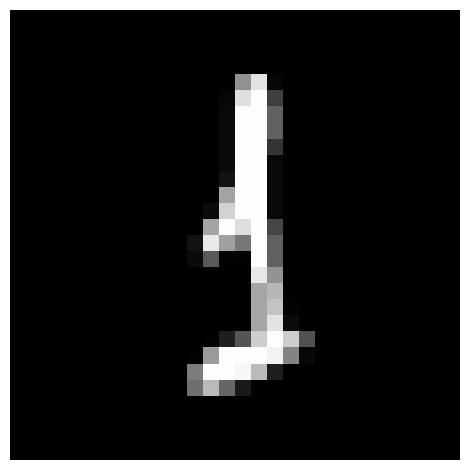

In [34]:
# Afprøver modellen på et givent index af billederne.
img_idx = 900
img = testing_images[img_idx][0]
pred = net(img)
print("Model output:")
print(pred)
sm = nn.Softmax(dim=1)
print("Efter softmax:")     
print(sm(pred))
print(f"Modul bud: {pred.argmax()}")
print(f"Korrekt svar: {testing_images[img_idx][1]}")
ts.show(img)
img.shape

tensor([[6.51586e-08, 9.53498e-07, 1.62210e-05, 9.85691e-01, 1.40241e-09,
         9.48439e-03, 2.27839e-10, 1.08978e-09, 4.80674e-03, 2.38675e-07]],
       grad_fn=<SoftmaxBackward0>)
tensor(3)


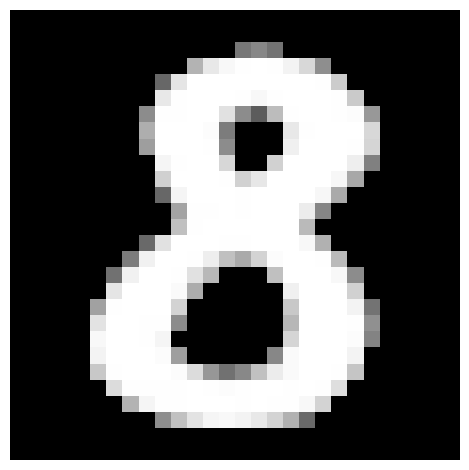

In [37]:
torch.set_printoptions(precision=5)
image = torchvision.io.decode_image("images_digits/image3.png")
ip = ImageProcessor()
image = ip.preprocess(image)
ts.show(image)
print(sm(net(image)))
print(sm(net(image)).argmax())